In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as st
import sklearn.metrics as skm
import statsmodels.api as sm

In [148]:
plt.rcParams["figure.figsize"] = (15, 3)

In [149]:
soy_data = [pd.read_csv(f'../data/futures_{year}.csv', index_col=0) for year in range(2020, 2023)]
weather_data = [pd.read_csv(f'../data/weather_{year}.csv', index_col=0) for year in range(2020, 2023)]

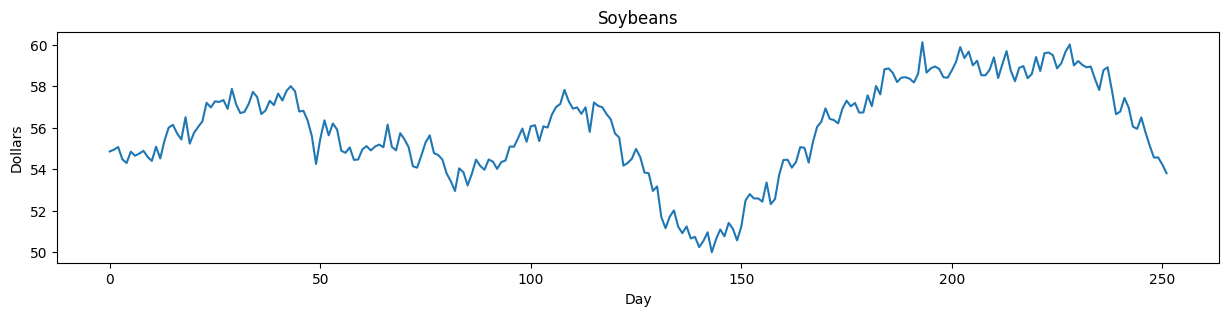

In [150]:
plt.xlabel('Day')
plt.ylabel('Dollars')
plt.title('Soybeans')
plt.plot(range(252), soy_data[2]['SBL'])
plt.show()

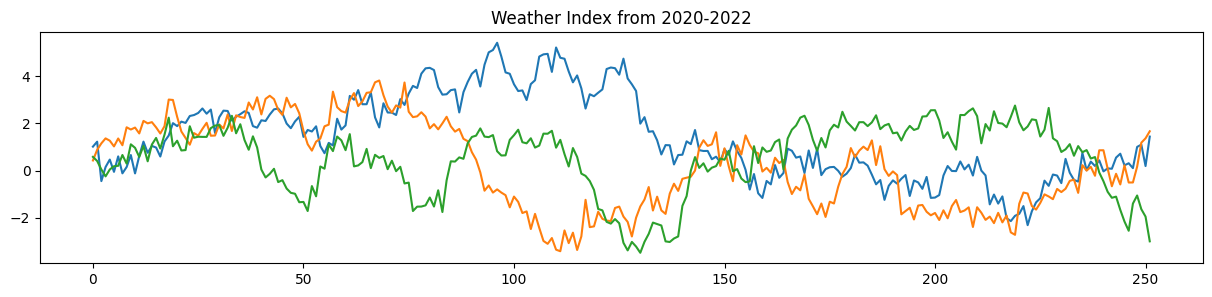

In [151]:
plt.title('Weather Index from 2020-2022')
for _, df in enumerate(weather_data):
    plt.plot(range(252), df['weather'])

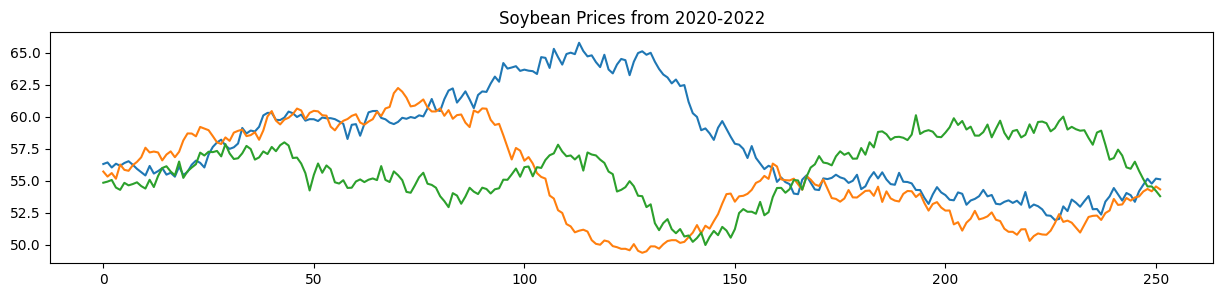

In [152]:
plt.title('Soybean Prices from 2020-2022')
for _, df in enumerate(soy_data):
    plt.plot(range(252), df['SBL'])

In [153]:
adf_vals = [adfuller(x['SBL']) for x in soy_data]

In [154]:
adf_w = [adfuller(w['weather']) for w in weather_data]

In [155]:
adf_w[2]

(-1.735194382975875,
 0.4130765354429181,
 1,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 352.3716954428693)

In [156]:
adf_vals[0]

(-0.7248099569814116,
 0.8402181197532936,
 2,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 389.2976064555561)

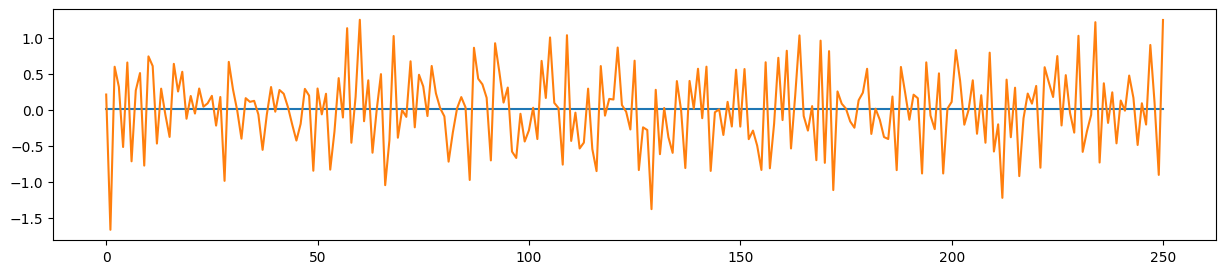

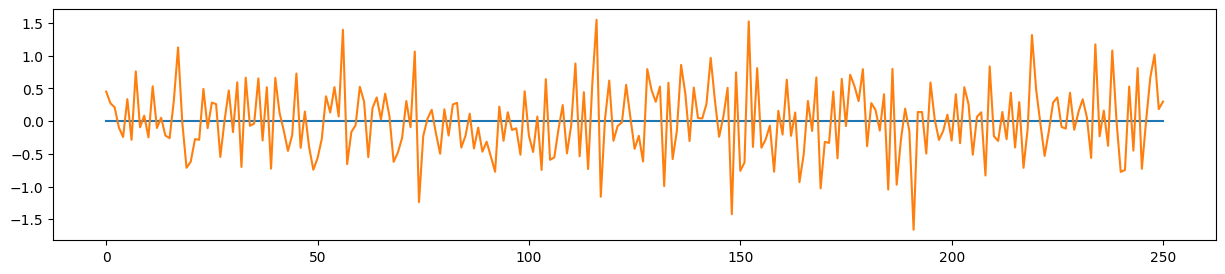

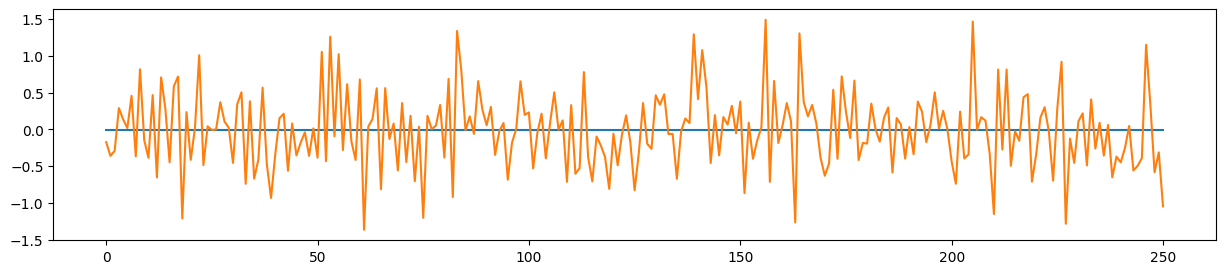

In [157]:
d1 = [np.diff(w['weather'], n=1) for w in weather_data]

for d in d1:
    plt.plot(range(len(d)), [d.mean()] * len(d))
    plt.plot(range(len(d)), d)
    plt.show()

In [158]:
d1_adf = [adfuller(d) for d in d1]
d1_adf[2][1]

0.0

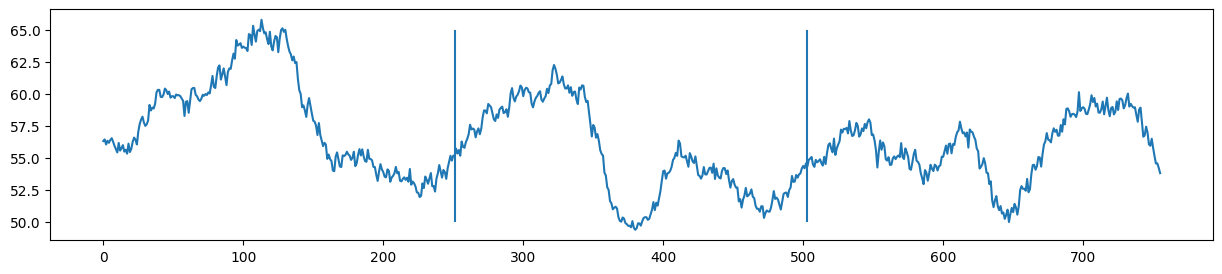

In [159]:
full_data = pd.concat([soy_data[0]['SBL'], soy_data[1]['SBL'], soy_data[2]['SBL']]).to_numpy()
full_w = pd.concat([weather_data[0]['weather'], weather_data[1]['weather'], weather_data[2]['weather']])
plt.vlines(x=[251, 503], ymin=50, ymax=65)

plt.plot(range(len(full_data)), full_data)
# plt.plot(full_w.to_numpy())

In [160]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(full_data, model="additive", period=252)

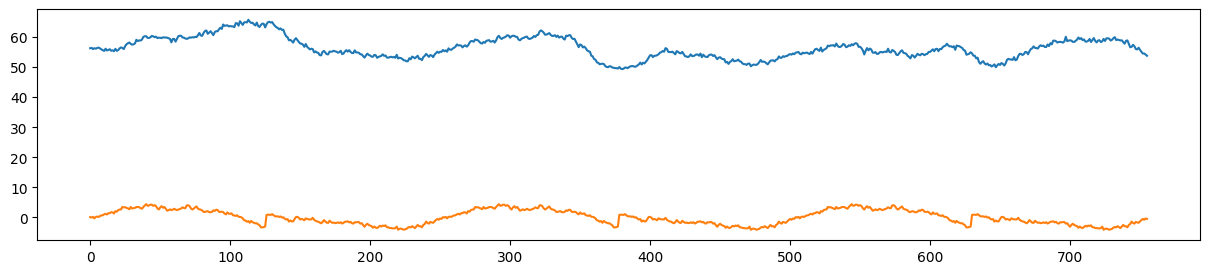

In [161]:
plt.plot(decomp.observed)
# plt.plot(decomp.trend)
# plt.plot(decomp.resid)
# plt.plot(decomp.trend + decomp.resid)
plt.plot(decomp.seasonal)

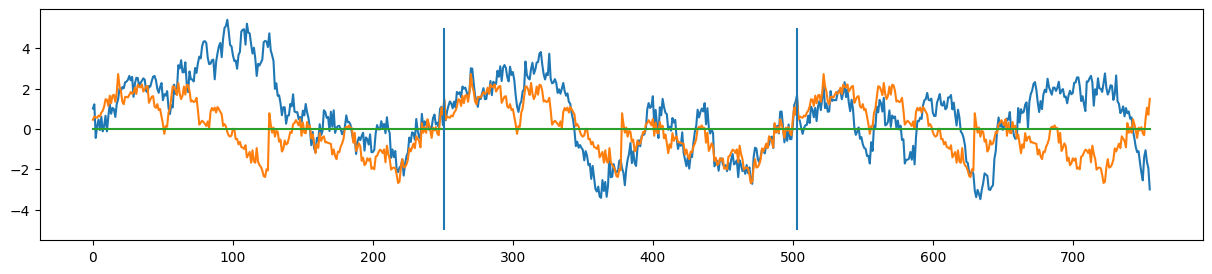

In [162]:
w_decomp = seasonal_decompose(full_w.to_numpy(), model='additive', period=252)
plt.plot(w_decomp.observed)
# plt.plot(w_decomp.resid)
# plt.plot(w_decomp.trend)
# plt.plot(w_decomp.trend + w_decomp.resid)
# plt.plot(w_decomp.observed - w_decomp.trend - w_decomp.resid)
plt.plot(w_decomp.seasonal)
plt.plot([w_decomp.seasonal.mean()]*756)
plt.vlines(x=[251, 503], ymin=-5, ymax=5)
# plt.xlim(left=252, right=504)

mean: 0.7044317344182399
var: 3.083759482058965


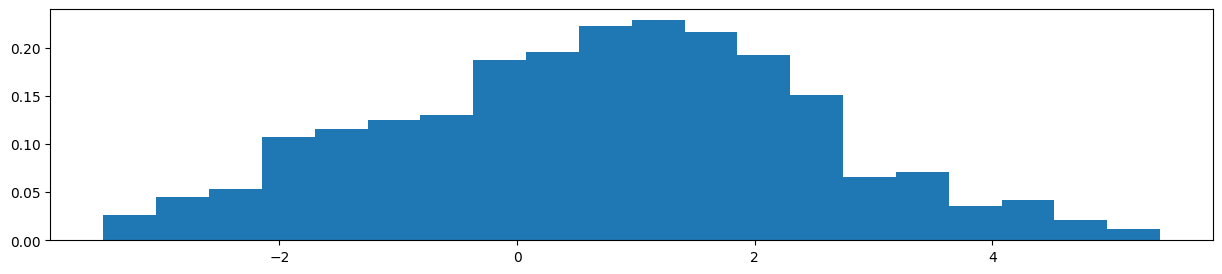

In [163]:
plt.hist(full_w, bins=20, density=True)
print(f'mean: {full_w.mean()}')
print(f'var: {full_w.var()}')

In [164]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
residual = w_decomp.seasonal - decomp.seasonal
adfuller(residual, 1)

(-3.9634526934566807,
 0.0016144500967834275,
 1,
 754,
 {'1%': -3.439052522969989,
  '5%': -2.8653808299915013,
  '10%': -2.5688152592363274},
 1225.501043291713)

In [165]:
seasonality = (decomp.seasonal[:252] + decomp.seasonal[252:504] + decomp.seasonal[504:756]) / 3

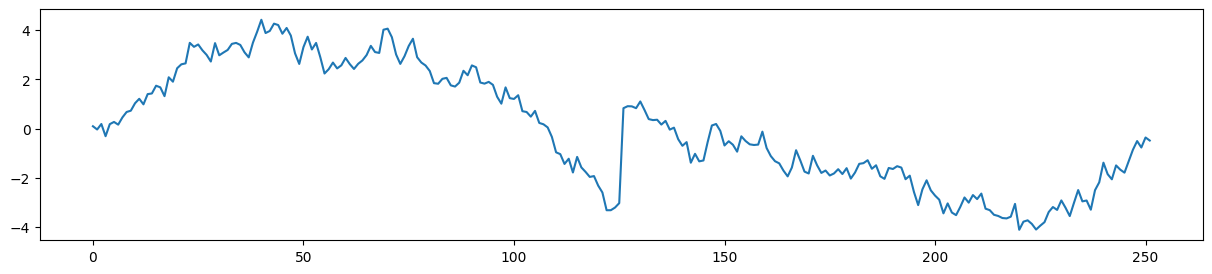

In [166]:
plt.plot(seasonality)

In [167]:
mse = [skm.mean_squared_error(seasonality, decomp.seasonal[i * 252:(i + 1) * 252]) for i in range(3)]
mse

[1.0482561554450527e-32, 1.0482561554450527e-32, 1.0482561554450527e-32]

In [168]:
np.savetxt('seasonality_case1.npy', seasonality, fmt='%f')

# SARIMAX

In [171]:
train = train.reshape(-1, 1)
test = test.reshape(-1, 1)
wtrain = wtrain.reshape(-1, 1)
wtest = wtest.reshape(-1, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [ ]:
model = arima.AutoARIMA(stepwise=False, n_jobs=2, trace=1, error_action="ignore",
                              suppress_warnings=True, d=1)

In [ ]:
model.fit(wtrain)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=938.317, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=890.786, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=887.046, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=888.555, Time=0.22 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=890.554, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=885.170, Time=0.09 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=887.673, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=887.127, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=888.727, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=888.182, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=887.116, Time=0.14 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=888.505, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=888.984, Time=0.54 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=886.471, Time=0.60 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=888.331, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[1] i

AutoARIMA(d=1, error_action='ignore', n_jobs=2, stepwise=False, trace=1)

In [ ]:
pred_len = 1
preds = []

for i in range(len(wtest)):
    pred = model.predict(n_periods=pred_len)
    preds.append(pred[0])
    model.update(wtest[i:i+pred_len])

(575.0, 792.75)

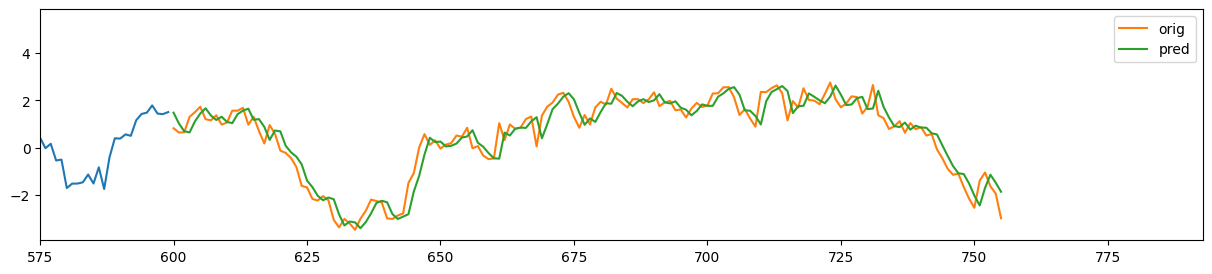

In [ ]:
plt.plot(range(len(wtrain)), wtrain)
plt.plot(range(len(wtrain), len(wtest) + len(wtrain)), wtest, label='orig')
plt.plot(range(len(wtrain), len(wtest) + len(wtrain)), preds, label='pred')
plt.legend()
plt.xlim(left=575)

In [ ]:
skm.mean_squared_error(stest, preds)

0.32496104364952805

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX